# 텍스트 마이닝
- 텍스트로부터 정보를 추출해내는 기법

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [76]:
# NaN 확인
df.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

# 텍스트 데이터 EDA

In [77]:
sns.set_theme(style = 'whitegrid', palette='pastel')

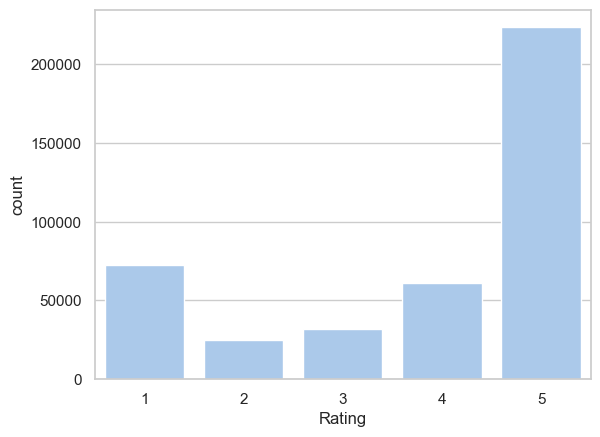

In [78]:
sns.countplot(data=df, x='Rating')
plt.show()

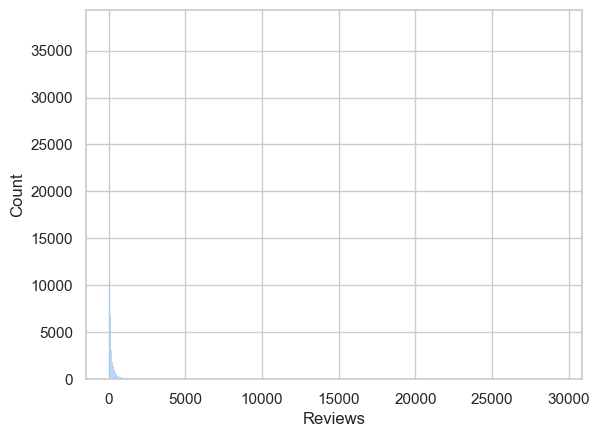

In [79]:
# 리뷰 길이의 분포 확인(글자수)
sns.histplot(df['Reviews'].dropna().map(len))
plt.show()

다른 텍스트에 비해 압도적으로 긴 텍스트를 BOW화 시키면, 희소행렬이 매우 심각하게 만들어질 가능성이 생김

In [80]:
# 제일 긴 리뷰의 길이만 확인
df['Reviews'].dropna().map(len).max()

29419

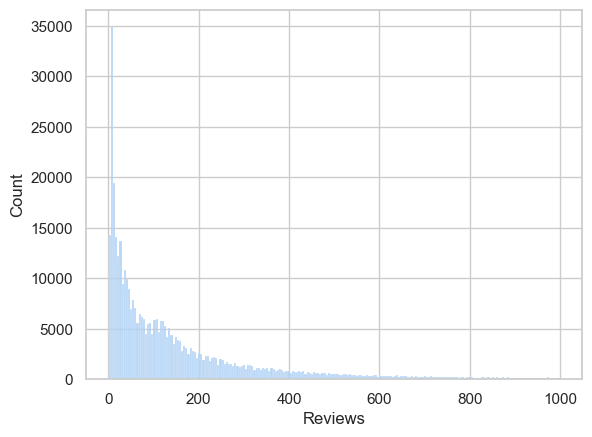

In [81]:
# 1000글자 미만의 리뷰만 시각화
reviews_chars = df['Reviews'].dropna().map(len)
reviews_chars_under_1000_msk = reviews_chars < 1000

sns.histplot(reviews_chars[reviews_chars_under_1000_msk])
plt.show()

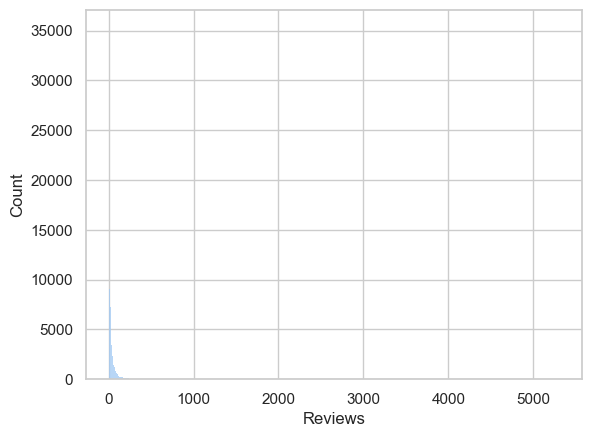

In [82]:
# 리뷰 단어의 개수 - Tokenizer를 사용.
sns.histplot(df['Reviews'].dropna().map(lambda x : len(x.split())))
plt.show()

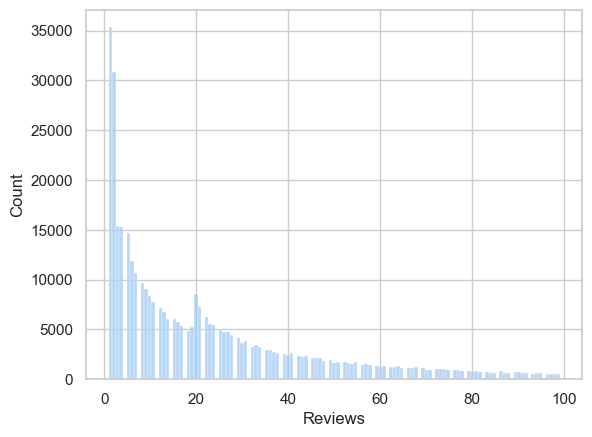

In [83]:
reviews_words = df['Reviews'].dropna().map(lambda x : len(x.split()))
reviews_words_under_100_mask = reviews_words < 100

sns.histplot(reviews_words[reviews_words_under_100_mask])
plt.show()

In [84]:
# 리뷰의 길이와 투표 수(Review Vote)의 상관관계
df['Review Words'] = df['Reviews'].dropna().map(lambda x : len(x.split()))
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,72.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,40.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,2.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,17.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,43.0


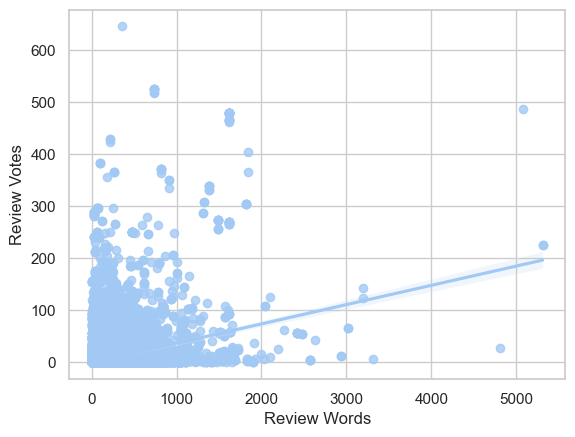

In [85]:
sns.regplot(x='Review Words', y='Review Votes', data=df)
plt.show()

In [86]:
# 애플과 삼성의 평균 평점
df[df['Brand Name'] == "Samsung"]['Rating'].mean()

3.9623556968378786

In [87]:
df[df['Brand Name'] == "Apple"]['Rating'].mean()

3.9244148076856975

# 텍스트 전처리 - nltk

In [88]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
# 정규식으로 특수문자 등 필요없는 부분들은 제거 (영어 단어만 남길 예정)
import numpy as np

df['Reviews'] = df['Reviews'].str.replace("[^a-zA-Z ]", "").str.strip()

nan_idx = df['Reviews'].notnull()
df = df.loc[nan_idx]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413770 entries, 0 to 413839
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413770 non-null  object 
 1   Brand Name    348616 non-null  object 
 2   Price         407840 non-null  float64
 3   Rating        413770 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401474 non-null  float64
 6   Review Words  413770 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 25.3+ MB


In [90]:
over_2_index = df['Reviews'].map(len) > 2
df = df.loc[over_2_index]
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,72.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,40.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,2.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,17.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,43.0


In [91]:
df_sample = df.dropna().sample(frac=0.01)
df_sample.shape

(3325, 7)

In [92]:
# Wordcloud 문장 내 단어의 등장 빈도를 시각화
#   모든 리뷰를 하나로 이어서 모든 리뷰 내의 단어 빈도수 확인
all_reviews = ' '.join(df_sample['Reviews'])
all_reviews

'I loved it, so good Phone was not what I ordered, very disappointed. Will not order again. I was really mad at first because I thought I bought a broken phone. Phone works they gave me a charger that was no good After a recent bad experience with a different phone from another company, I was skeptical about trying another uncommon brand. I\'m very happy to say it has everything I wanted and so far it works perfectly. I\'m loving this phone, especially for the price! The only major downfall I\'ve found with this phone is that they don\'t make phone cases for it. However, I did order a belt clip case so I at least have somewhere to safely carry it. Everything ok No conecta bien .Agarra pobre señal. At first, the phone looks nice, and without the OTA update, can be used. After the system update, weird apps are automatically installed, demanding certain settings, which will bombard you with unwanted advertising and, weird communication to the Internet. The Chinese firmware doesn\'t make i

In [93]:
all_reviews_lower = all_reviews.lower()
all_reviews_lower

'i loved it, so good phone was not what i ordered, very disappointed. will not order again. i was really mad at first because i thought i bought a broken phone. phone works they gave me a charger that was no good after a recent bad experience with a different phone from another company, i was skeptical about trying another uncommon brand. i\'m very happy to say it has everything i wanted and so far it works perfectly. i\'m loving this phone, especially for the price! the only major downfall i\'ve found with this phone is that they don\'t make phone cases for it. however, i did order a belt clip case so i at least have somewhere to safely carry it. everything ok no conecta bien .agarra pobre señal. at first, the phone looks nice, and without the ota update, can be used. after the system update, weird apps are automatically installed, demanding certain settings, which will bombard you with unwanted advertising and, weird communication to the internet. the chinese firmware doesn\'t make i

In [94]:
nltk.download('punkt_tab')

all_reviews_tokens = nltk.word_tokenize(all_reviews_lower)
all_reviews_tokens[:10]

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['i', 'loved', 'it', ',', 'so', 'good', 'phone', 'was', 'not', 'what']

In [95]:
# 불용어 제거
all_reviews_tokens_clean =  [token for token in all_reviews_tokens if token not in stopwords.words("english")]
all_reviews_tokens_clean[:10]

['loved',
 ',',
 'good',
 'phone',
 'ordered',
 ',',
 'disappointed',
 '.',
 'order',
 '.']

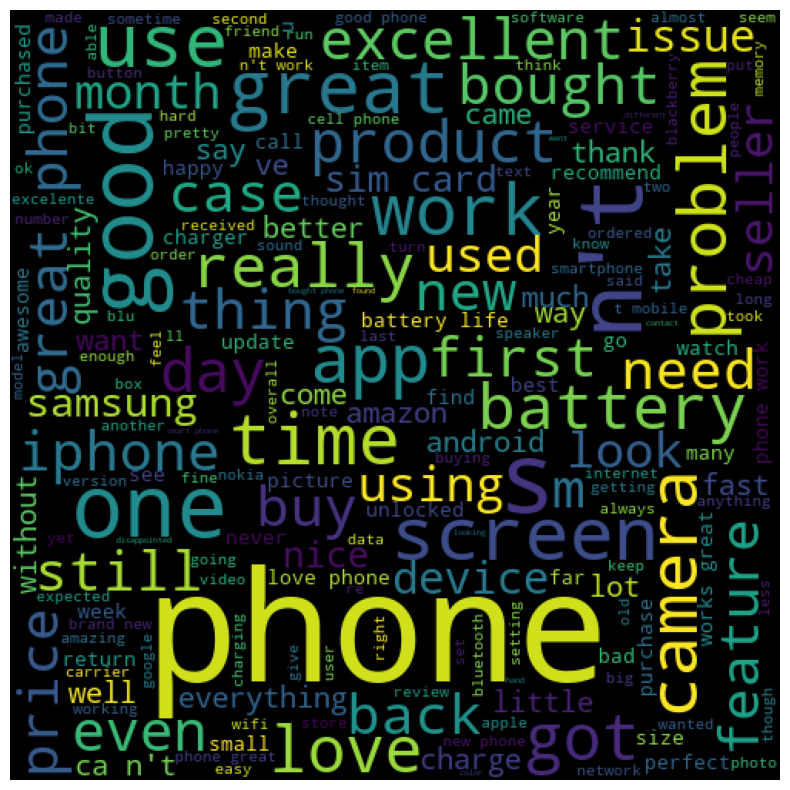

In [96]:
from wordcloud import WordCloud

# 워드클라우드는 값이 큰 리뷰에 대해서 글씨 크기를 크게 설정, 값이 적은 리뷰는 작게 설정
wc = WordCloud(max_font_size=100, width=500, height=500)

all_reviews_wc = wc.generate(' '.join(all_reviews_tokens_clean))

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(all_reviews_wc)
plt.show()

In [97]:
# 워드 클라우드를 여러번 그리면서 전처리 과정을 간소화 하기 위해 함수로 만들어 놓기
def clean_reviews(df):

  # 데이터 프레임의 리뷰를 하나의 문자열로 이어주기
  reviews = ' '.join(df['Reviews'])

  # 소문자화 수행
  reviews_lower = reviews.lower()

  # 토큰화
  reviews_tokens = nltk.word_tokenize(reviews_lower)

  # 불용어 제거
  reviews_tokens_clean = [ token for token in reviews_tokens if token not in stopwords.words("english") ]

  return reviews_tokens_clean

def draw_wordcloud(df):
  global wc

  # 전처리가 완료된 토큰 얻어내기
  reviews_tokens_clean = clean_reviews(df)

  # 워드클라우드 그리기(이미지 받기)
  reviews_wc = wc.generate(' '.join(reviews_tokens_clean))

  return reviews_wc

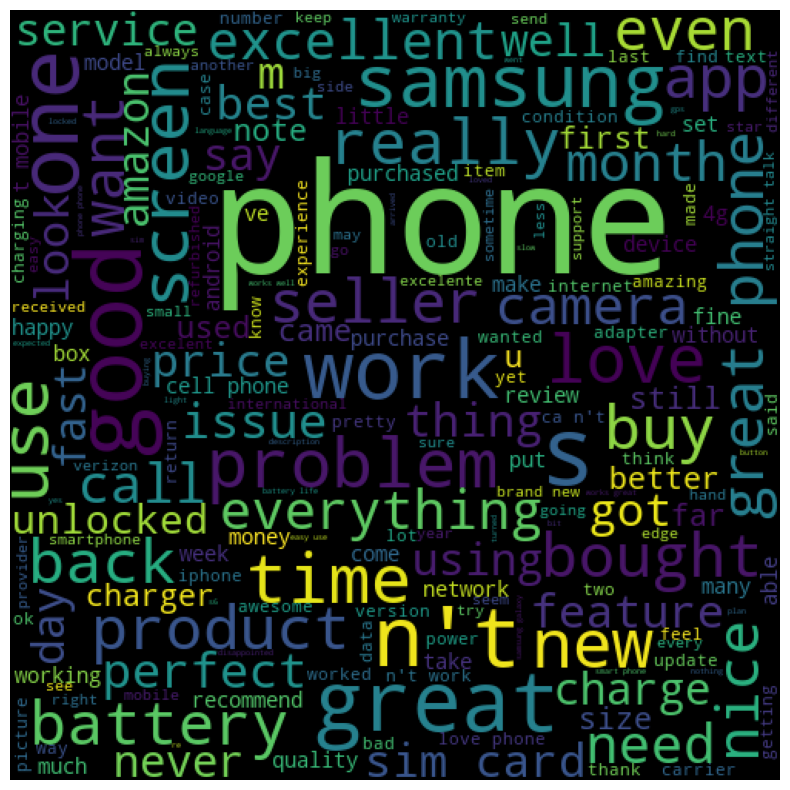

In [98]:
#삼성 폰에 대해서만 워드클라우드
df_samsung = df_sample[df_sample["Brand Name"] == "Samsung"]

samsung_review_wc = draw_wordcloud(df_samsung)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(samsung_review_wc)
plt.show()

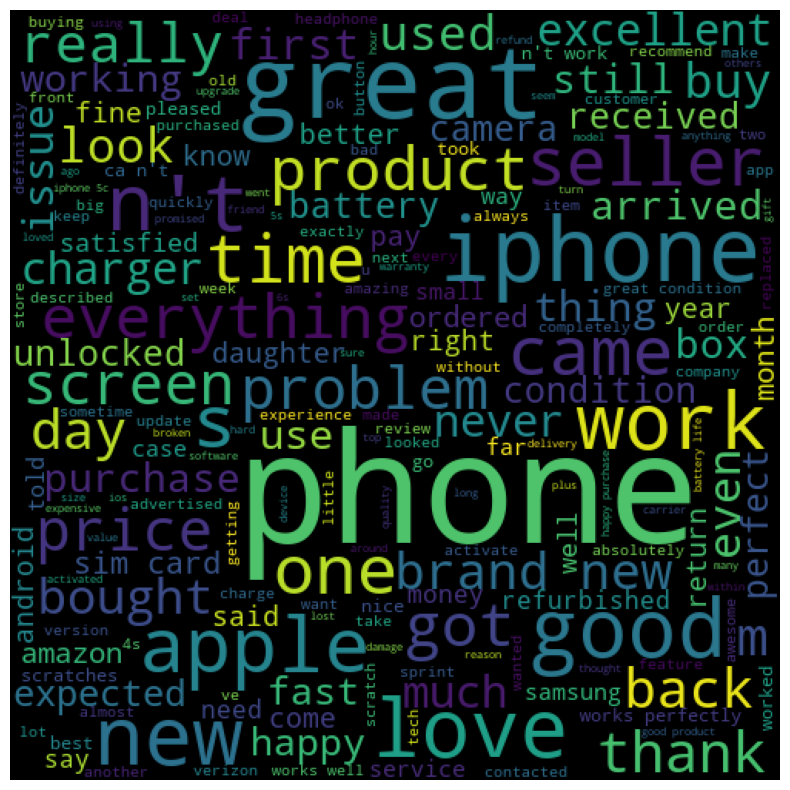

In [99]:
#삼성 폰에 대해서만 워드클라우드
df_samsung = df_sample[df_sample["Brand Name"] == "Apple"]

samsung_review_wc = draw_wordcloud(df_samsung)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(samsung_review_wc)
plt.show()

# Spacy 사용하기

In [100]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [101]:
# pip install spacy
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [102]:
test_sentence = """I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two."""

In [103]:
# nlp에 문서(문장)을 집어 넣어서 doc에서 처리한다.
doc = nlp(test_sentence)
doc.text # 원본 문장 확인

"I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two."

In [104]:
# doc가 가지고 있는 정보는 단어 정보
for word_token in doc:
    print("word : {}\t\tPOS : {}\t\tLemma : {}".format(word_token.text, word_token.pos_, word_token.lemma_))

word : I		POS : PRON		Lemma : I
word : 'm		POS : AUX		Lemma : be
word : at		POS : ADP		Lemma : at
word : a		POS : DET		Lemma : a
word : payphone		POS : NOUN		Lemma : payphone
word : ,		POS : PUNCT		Lemma : ,
word : trying		POS : VERB		Lemma : try
word : to		POS : PART		Lemma : to
word : call		POS : VERB		Lemma : call
word : home		POS : ADV		Lemma : home
word : .		POS : PUNCT		Lemma : .
word : All		POS : PRON		Lemma : all
word : of		POS : ADP		Lemma : of
word : my		POS : PRON		Lemma : my
word : change		POS : NOUN		Lemma : change
word : I		POS : PRON		Lemma : I
word : spent		POS : VERB		Lemma : spend
word : on		POS : ADP		Lemma : on
word : you		POS : PRON		Lemma : you
word : .		POS : PUNCT		Lemma : .
word : Where		POS : SCONJ		Lemma : where
word : have		POS : AUX		Lemma : have
word : the		POS : DET		Lemma : the
word : times		POS : NOUN		Lemma : time
word : gone		POS : VERB		Lemma : go
word : ..		POS : PUNCT		Lemma : ..
word : Baby		POS : PROPN		Lemma : Baby
word : ,		POS : PUNCT		Lemma :

In [105]:
# doc가 가지고 있는 정보는 단어 정보
for word_token in doc:
    print("word : {}\t\tPOS : {}\t\tLemma : {}".format(word_token.text, word_token.pos_, word_token.lemma_))

word : I		POS : PRON		Lemma : I
word : 'm		POS : AUX		Lemma : be
word : at		POS : ADP		Lemma : at
word : a		POS : DET		Lemma : a
word : payphone		POS : NOUN		Lemma : payphone
word : ,		POS : PUNCT		Lemma : ,
word : trying		POS : VERB		Lemma : try
word : to		POS : PART		Lemma : to
word : call		POS : VERB		Lemma : call
word : home		POS : ADV		Lemma : home
word : .		POS : PUNCT		Lemma : .
word : All		POS : PRON		Lemma : all
word : of		POS : ADP		Lemma : of
word : my		POS : PRON		Lemma : my
word : change		POS : NOUN		Lemma : change
word : I		POS : PRON		Lemma : I
word : spent		POS : VERB		Lemma : spend
word : on		POS : ADP		Lemma : on
word : you		POS : PRON		Lemma : you
word : .		POS : PUNCT		Lemma : .
word : Where		POS : SCONJ		Lemma : where
word : have		POS : AUX		Lemma : have
word : the		POS : DET		Lemma : the
word : times		POS : NOUN		Lemma : time
word : gone		POS : VERB		Lemma : go
word : ..		POS : PUNCT		Lemma : ..
word : Baby		POS : PROPN		Lemma : Baby
word : ,		POS : PUNCT		Lemma :

In [106]:
from tqdm import tqdm

under_100_words_mask = df_sample.dropna()['Review Words'] < 100
df_sample_under_100 = df_sample[under_100_words_mask]
df_sample_under_100

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words
110502,BLU Dash JR 4.0 K Smartphone - Unlocked - Silver,BLU,125.00,5,"I loved it, so good",0.0,5.0
75002,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,1,"Phone was not what I ordered, very disappointe...",1.0,12.0
42583,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,3,I was really mad at first because I thought I ...,2.0,25.0
409170,verykool Jet SL5009 manufacture unlocked GSM s...,verykool,103.98,5,After a recent bad experience with a different...,0.0,80.0
353699,Samsung Galaxy S5 Mini G800H Unlocked Cellphon...,Samsung,350.00,5,Everything ok,0.0,2.0
...,...,...,...,...,...,...,...
111389,BLU Dash JR 4.0 K Smartphone - Unlocked - White,BLU,43.95,5,Excellent,0.0,1.0
370360,Samsung Galaxy S7 Edge Duos SM-G935FD 32GB Dua...,Samsung,590.49,4,"Could bem the right charger, im from brazil an...",0.0,19.0
147698,BLU Studio C 5+5 Smartphone with Lollipop OS- ...,BLU,81.58,4,Bought this phone mainly for a back up phone. ...,0.0,48.0
121247,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,Really nice phone like it hope there will be u...,0.0,11.0


In [107]:
# 모든 리뷰를 소문자로 변경
df_sample_under_100['Reviews lower'] = df_sample["Reviews"].apply(lambda x : x.lower())
df_sample_under_100.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13152\1440120836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Reviews lower'] = df_sample["Reviews"].apply(lambda x : x.lower())


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words,Reviews lower
110502,BLU Dash JR 4.0 K Smartphone - Unlocked - Silver,BLU,125.00,5,"I loved it, so good",0.0,5.0,"i loved it, so good"
75002,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,1,"Phone was not what I ordered, very disappointe...",1.0,12.0,"phone was not what i ordered, very disappointe..."
42583,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,3,I was really mad at first because I thought I ...,2.0,25.0,i was really mad at first because i thought i ...
409170,verykool Jet SL5009 manufacture unlocked GSM s...,verykool,103.98,5,After a recent bad experience with a different...,0.0,80.0,after a recent bad experience with a different...
353699,Samsung Galaxy S5 Mini G800H Unlocked Cellphon...,Samsung,350.00,5,Everything ok,0.0,2.0,everything ok


In [108]:
%%time

# 전처리 된 토큰을 저장할 리스트
tokens_preprocessed = []

# nlp.pipe : 문장이 들어있는 배열에서 문장을 하나씩 하나씩 꺼내서 nlp에 넣어주는 역할
for doc in tqdm(nlp.pipe(df_sample_under_100["Reviews lower"])):
  # doc 에서 전처리
  # 단어는 전부 Lemma화, 특수기호 뺄거고, 의미없는 공백 빼고, 불용어 처리
  clean_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop ]
  tokens_preprocessed.append(clean_tokens)

tokens_preprocessed[:3]


3016it [00:07, 430.47it/s]

CPU times: total: 6.98 s
Wall time: 7.01 s


[['love', 'good'],
 ['phone', 'order', 'disappointed', 'order'],
 ['mad',
  'think',
  'buy',
  'broken',
  'phone',
  'phone',
  'work',
  'give',
  'charger',
  'good']]

In [109]:
sentences = [
    '피카츄 라이츄 파이리 꼬부기',
    '피카츄 라이츄 의 진화 전 포켓몬 입니다',
    '피카츄 라이츄 파이리 꼬부기',
    '피카츄 라이츄 파이리 는 친구 입니다'
]

word_lsts = [ s.split() for s in sentences ]
word_lsts

[['피카츄', '라이츄', '파이리', '꼬부기'],
 ['피카츄', '라이츄', '의', '진화', '전', '포켓몬', '입니다'],
 ['피카츄', '라이츄', '파이리', '꼬부기'],
 ['피카츄', '라이츄', '파이리', '는', '친구', '입니다']]

In [110]:
from gensim.models.phrases import Phrases, Phraser

# 바이그램 모델 생성
# threshold : 값이 작아지면 작아질 수록 두 토큰을 잘 붙여준다.
#             기본 값은 무조건 10.0이고, 양수. 0.01같이 작은 값으로 설정하면
#             웬만하면 합성어가 된다.
bigram = Phrases(word_lsts, min_count=1, threshold=1, delimiter='_')

# 바이그램 변환
bigram_phraser = Phraser(bigram)

# 문장 토큰을 뽑아요.
for word_list in word_lsts:
  # 문장 토큰을 bigram_phraser에 넣어서 bigram 목록 생성
  bigram_s = bigram_phraser[word_list]

  print("유니그램 : {}".format(word_list))
  print("바이그램 : {}".format(bigram_s))
  print("-"*40)

유니그램 : ['피카츄', '라이츄', '파이리', '꼬부기']
바이그램 : ['피카츄_라이츄', '파이리_꼬부기']
----------------------------------------
유니그램 : ['피카츄', '라이츄', '의', '진화', '전', '포켓몬', '입니다']
바이그램 : ['피카츄_라이츄', '의', '진화', '전', '포켓몬', '입니다']
----------------------------------------
유니그램 : ['피카츄', '라이츄', '파이리', '꼬부기']
바이그램 : ['피카츄_라이츄', '파이리_꼬부기']
----------------------------------------
유니그램 : ['피카츄', '라이츄', '파이리', '는', '친구', '입니다']
바이그램 : ['피카츄_라이츄', '파이리', '는', '친구', '입니다']
----------------------------------------


In [111]:
# trigram : 바이그램을 다시한번 묶어주면 된다.
#  bigram_phraser[word_lsts] : 모든 문장에 대한 바이그램
trigram = Phrases(bigram_phraser[word_lsts], min_count=1, threshold=1.0, delimiter="_")
trigram_phraser = Phraser(trigram)

bigram_vocab_set = set(bigram.vocab.keys())
trigram_vocab_set = set(trigram.vocab.keys())

print("== Bigram Model vocab")
print({vocab for vocab in bigram_vocab_set})
print("--"*20)
print("== Trigram Model vocab")
print({vocab for vocab in trigram_vocab_set})
print("--"*20)

== Bigram Model vocab
{'의_진화', '라이츄', '전_포켓몬', '파이리', '꼬부기', '친구', '입니다', '피카츄', '전', '포켓몬', '진화_전', '피카츄_라이츄', '라이츄_의', '는_친구', '라이츄_파이리', '의', '포켓몬_입니다', '는', '파이리_는', '파이리_꼬부기', '친구_입니다', '진화'}
----------------------------------------
== Trigram Model vocab
{'의_진화', '전_포켓몬', '파이리', '피카츄_라이츄_의', '피카츄_라이츄_파이리', '친구', '입니다', '피카츄_라이츄_파이리_꼬부기', '전', '포켓몬', '진화_전', '피카츄_라이츄', '는_친구', '의', '포켓몬_입니다', '는', '파이리_꼬부기', '파이리_는', '친구_입니다', '진화'}
----------------------------------------


# 리뷰 데이터 trigfram 만들기

In [128]:
bigram_model = Phrases(tokens_preprocessed)
bigram_phraser = Phraser(bigram_model)

In [129]:
# 바이그램 토큰 생성
bigram_tokens = [ bigram_phraser[token] for token in tokens_preprocessed ]
bigram_tokens[:3]

[['love', 'good'],
 ['phone', 'order', 'disappointed', 'order'],
 ['mad',
  'think',
  'buy',
  'broken',
  'phone',
  'phone',
  'work',
  'give',
  'charger',
  'good']]

In [130]:
# 트라이그램 토큰 생성
trigram_model = Phrases(bigram_tokens) # 바이그램 토큰으로 트라이그램 토큰 생성
trigram_phraser = Phraser(trigram_model)

In [127]:
df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in trigram_tokens ]
df_sample_under_100.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13152\3260704811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in trigram_tokens ]


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words,Reviews lower,Review Preprocessed
110502,BLU Dash JR 4.0 K Smartphone - Unlocked - Silver,BLU,125.00,5,"I loved it, so good",0.0,5.0,"i loved it, so good",love good
75002,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,1,"Phone was not what I ordered, very disappointe...",1.0,12.0,"phone was not what i ordered, very disappointe...",phone order disappointed order
42583,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,3,I was really mad at first because I thought I ...,2.0,25.0,i was really mad at first because i thought i ...,mad think buy broken phone phone work give cha...
409170,verykool Jet SL5009 manufacture unlocked GSM s...,verykool,103.98,5,After a recent bad experience with a different...,0.0,80.0,after a recent bad experience with a different...,recent bad experience different phone company ...
353699,Samsung Galaxy S5 Mini G800H Unlocked Cellphon...,Samsung,350.00,5,Everything ok,0.0,2.0,everything ok,ok


In [116]:
df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in trigram_tokens ]
df_sample_under_100.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13152\3260704811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in trigram_tokens ]


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words,Reviews lower,Review Preprocessed
110502,BLU Dash JR 4.0 K Smartphone - Unlocked - Silver,BLU,125.00,5,"I loved it, so good",0.0,5.0,"i loved it, so good",love good
75002,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,1,"Phone was not what I ordered, very disappointe...",1.0,12.0,"phone was not what i ordered, very disappointe...",phone order disappointed order
42583,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,3,I was really mad at first because I thought I ...,2.0,25.0,i was really mad at first because i thought i ...,mad think buy broken phone phone work give cha...
409170,verykool Jet SL5009 manufacture unlocked GSM s...,verykool,103.98,5,After a recent bad experience with a different...,0.0,80.0,after a recent bad experience with a different...,recent bad experience different phone company ...
353699,Samsung Galaxy S5 Mini G800H Unlocked Cellphon...,Samsung,350.00,5,Everything ok,0.0,2.0,everything ok,ok


# TfidVectorizer 사용
- 단순하게 카운트만 보는게 아닌, 각 단어의 문장 내 중요도를 보고, 중요한 단어들을 더 크게 워드클라우드로 그리겠다.

In [126]:
from sklearn.feature_extraction.text import TfidfTransformer

review_tfid_vectorizer = TfidfTransformer().fit(df_sample_under_100["Review Preprocessed"])

ValueError: could not convert string to float: 'love good'

In [125]:
# 문서 덩어리를 받을 예정.
#  ex) 삼성 핸드폰 중 좋은 평가를 받은 리뷰에 대해서만 점수를 계산
def sum_tfidf_score(documents):
  # 입력된 리뷰에 대한 tfidf 값 구하기
  tfidf_scores = review_tfidf_vectorizer.transform(documents)

  # 단어와, 그 단어에 대한 tfidf 점수 합을 저장할 딕셔너리
  scores = {}

  # 단어 별 점수 구하기
  for document, tfidf_score in zip(documents, tfidf_scores):
    # 현재 document는 spacy를 이용한 전처리가 수행되지 않은 상황
    doc = nlp(document)

    # spacy를 통한 전처리
    clean_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop ]

    # 각 문서 별 단어를 꺼내서
    for term in clean_tokens:

      # tfidf의 단어집합에 존재 한다면
      if term in review_tfidf_vectorizer.vocabulary_.keys():

        # 점수를 구해서 합쳐주기
        scores[term] = tfidf_score[0, review_tfidf_vectorizer.vocabulary_[str(term).strip()]] + scores.get(term, 0)

  return scores

In [123]:
# 애플의 좋은 리뷰에 대한 단어를 워드 클라우드로 분석
df_apple = df_sample_under_100[df_sample_under_100['Brand Name'] == "Apple"]
df_apple_rating_over_3 = df_apple[df_apple["Rating"] > 3]
df_apple_rating_over_3

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Words,Reviews lower,Review Preprocessed
51496,Apple iPhone 6 128GB Factory Unlocked GSM 4G L...,Apple,428.02,4,Phone was nice but there wasn't headphone,0.0,7.0,phone was nice but there wasn't headphone,phone nice headphone
36636,Apple iPhone 5c 8GB Unlocked GSM Smartphone w/...,Apple,159.99,5,realy Great,0.0,2.0,realy great,realy great
50221,"Apple iPhone 5s Unlocked Cellphone, 64 GB, Gold",Apple,409.95,5,excellent phone!,0.0,2.0,excellent phone!,excellent phone
38549,"Apple iPhone 5c AT&T Cellphone, 16GB, White",Apple,39.99,5,It was exactly what I wanted and what it said ...,0.0,56.0,it was exactly what i wanted and what it said ...,exactly want say minor scuff basically brand_n...
63656,"Apple iPhone 6, Silver, 64 GB (Sprint)",Apple,580.00,5,Great! Works like new,0.0,4.0,great! works like new,great work like new
...,...,...,...,...,...,...,...,...,...
18939,Apple iPhone 5 16GB (Black) - T-Mobile,Apple,209.00,5,Love it great phone and it was shipped on time...,4.0,31.0,love it great phone and it was shipped on time...,love great phone ship time phone great conditi...
80034,Apple Watch Sport 42mm Space Gray Aluminum Cas...,Apple,249.99,5,Arrived early .. only took 3 days.. perfect.. ...,1.0,26.0,arrived early .. only took 3 days.. perfect.. ...,arrive early take 3_day perfect need charge lo...
28147,Apple iPhone 5c 32GB - Unlocked - (Green),Apple,224.77,5,"Excellent, thanks for the phone .. it's in top...",0.0,12.0,"excellent, thanks for the phone .. it's in top...",excellent thank phone condition look new
74601,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,500.00,5,fantastic,0.0,1.0,fantastic,fantastic


In [131]:
# 애플 스마트폰에 대한 긍정적인 평가의 각 단어 별 tfidf 점수합 확인
apple_pos_review_tfidf_sum = sum_tfidf_score(df_apple_rating_over_3)

NameError: name 'review_tfidf_vectorizer' is not defined